<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-08-03 23:47:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.5MB/s    in 2.4s    

2025-08-03 23:47:04 (64.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


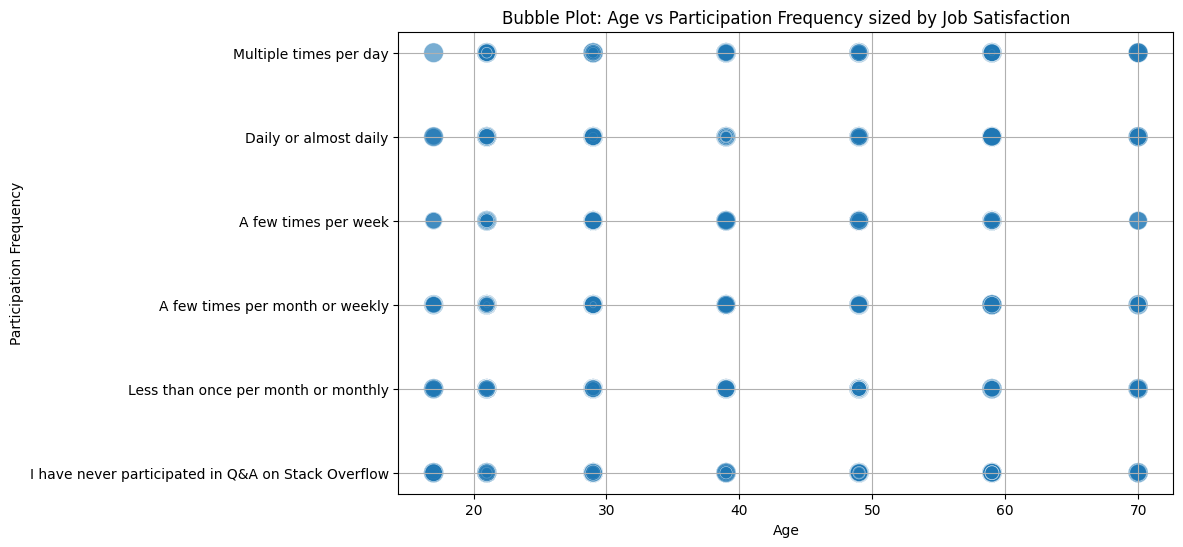

In [6]:
##Write your code here
import matplotlib.pyplot as plt

# Map SOPartFreq to numeric scale
partfreq_map = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# Map Age to numeric values (adjust your age_map if needed)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df['Age_num'] = df['Age'].map(age_map)

# Prepare data subset with no NaNs in required columns
plot_df = df[['Age_num', 'SOPartFreq', 'JobSat']].dropna()

# Map SOPartFreq
plot_df['SOPartFreq_num'] = plot_df['SOPartFreq'].map(partfreq_map)

# JobSat is already numeric, but convert to float just in case
plot_df['JobSat_num'] = plot_df['JobSat'].astype(float)

# Drop rows with NaN after mapping
plot_df = plot_df.dropna(subset=['Age_num', 'SOPartFreq_num', 'JobSat_num'])

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    x=plot_df['Age_num'],
    y=plot_df['SOPartFreq_num'],
    s=plot_df['JobSat_num'] * 20,  # Adjust size scale if needed
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.title('Bubble Plot: Age vs Participation Frequency sized by Job Satisfaction')

# Use original SOPartFreq categories as y-axis labels
plt.yticks(list(partfreq_map.values()), list(partfreq_map.keys()))
plt.grid(True)
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


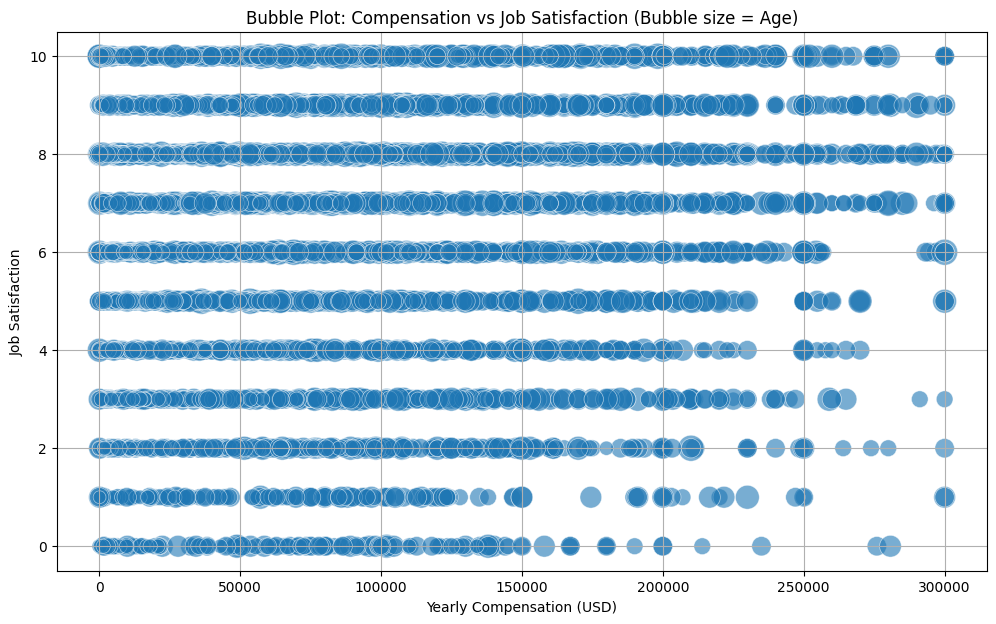

In [7]:
##Write your code here
import matplotlib.pyplot as plt

# Map Age groups to numeric values for bubble sizes
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Create a new numeric Age column
df['Age_num'] = df['Age'].map(age_map)

# Prepare data subset, drop rows with missing data in needed columns
plot_df = df[['ConvertedCompYearly', 'JobSat', 'Age_num']].dropna()

# Convert JobSat to float (in case it's not)
plot_df['JobSat_num'] = plot_df['JobSat'].astype(float)

# Optional: Remove extreme compensation outliers for better visualization (e.g., cap at 300k)
plot_df = plot_df[plot_df['ConvertedCompYearly'] <= 300000]

# Plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=plot_df['ConvertedCompYearly'],
    y=plot_df['JobSat_num'],
    s=plot_df['Age_num'] * 5,  # Scale size for visibility, adjust multiplier if needed
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble size = Age)')
plt.grid(True)
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



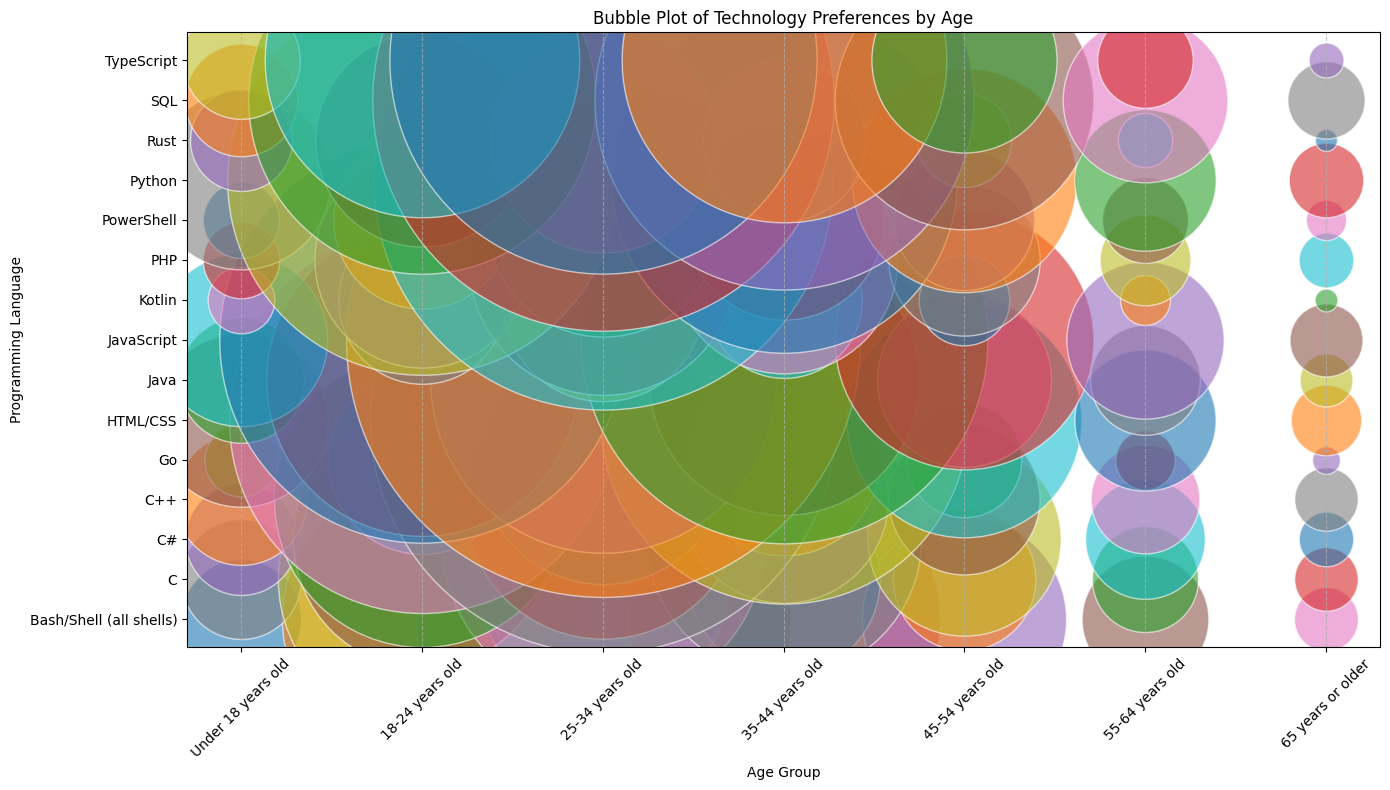

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Map age groups to keep order in the plot
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Drop rows with missing Age or Language data
df_clean = df.dropna(subset=['Age', 'LanguageHaveWorkedWith'])

# Filter Age to valid groups only, if needed (optional)
df_clean = df_clean[df_clean['Age'].isin(age_order)]

# Split languages into multiple rows
df_expanded = df_clean.assign(
    Language=df_clean['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Count frequency of each Language per Age group
freq = df_expanded.groupby(['Age', 'Language']).size().reset_index(name='Count')

# To reduce clutter, keep only top N languages overall (optional)
top_langs = freq.groupby('Language')['Count'].sum().nlargest(15).index
freq_top = freq[freq['Language'].isin(top_langs)]

# Pivot for easier plotting
pivot_df = freq_top.pivot(index='Language', columns='Age', values='Count').fillna(0)

# Reorder columns (Age groups)
pivot_df = pivot_df[age_order]

# Plotting bubble plot
plt.figure(figsize=(14, 8))
for i, lang in enumerate(pivot_df.index):
    for j, age in enumerate(pivot_df.columns):
        size = pivot_df.loc[lang, age]
        if size > 0:
            plt.scatter(
                j, i, s=size*10,  # scale size for visibility
                alpha=0.6, edgecolors='w'
            )

plt.xticks(range(len(age_order)), age_order, rotation=45)
plt.yticks(range(len(pivot_df.index)), pivot_df.index)
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.title('Bubble Plot of Technology Preferences by Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


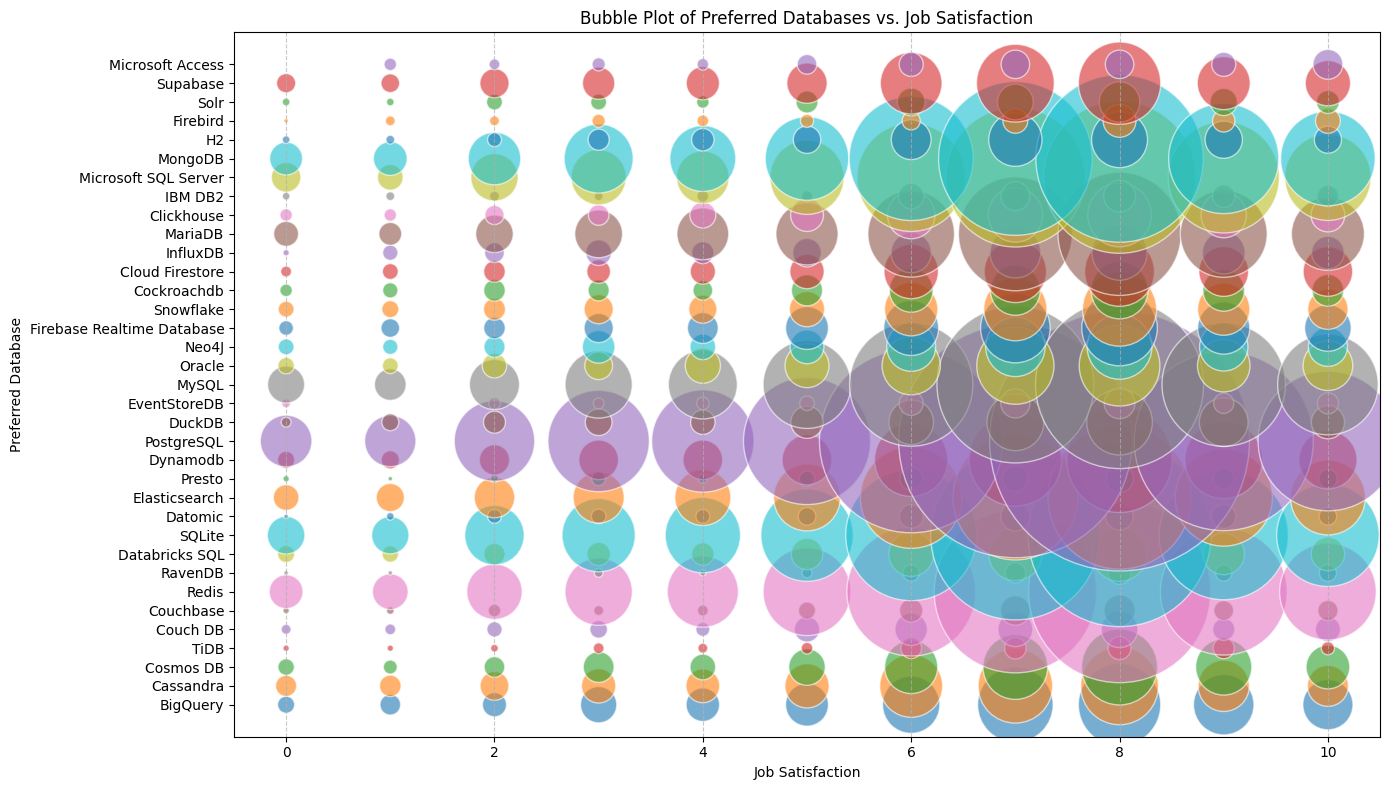

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing Database or JobSat data
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Explode the semicolon-separated database preferences
df_expanded = df_clean.assign(
    Database=df_clean['DatabaseWantToWorkWith'].str.split(';')
).explode('Database')

# Group by Database and JobSat, count respondents
grouped = df_expanded.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

# Sort job satisfaction for better x-axis ordering (assuming JobSat numeric)
grouped = grouped.sort_values('JobSat')

# Plot bubble chart
plt.figure(figsize=(14, 8))
for db in grouped['Database'].unique():
    subset = grouped[grouped['Database'] == db]
    plt.scatter(
        subset['JobSat'],
        [db]*len(subset),
        s=subset['Count'] * 10,  # scale bubble size, adjust as needed
        alpha=0.6,
        edgecolors='w',
        label=db
    )

plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Database')
plt.title('Bubble Plot of Preferred Databases vs. Job Satisfaction')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


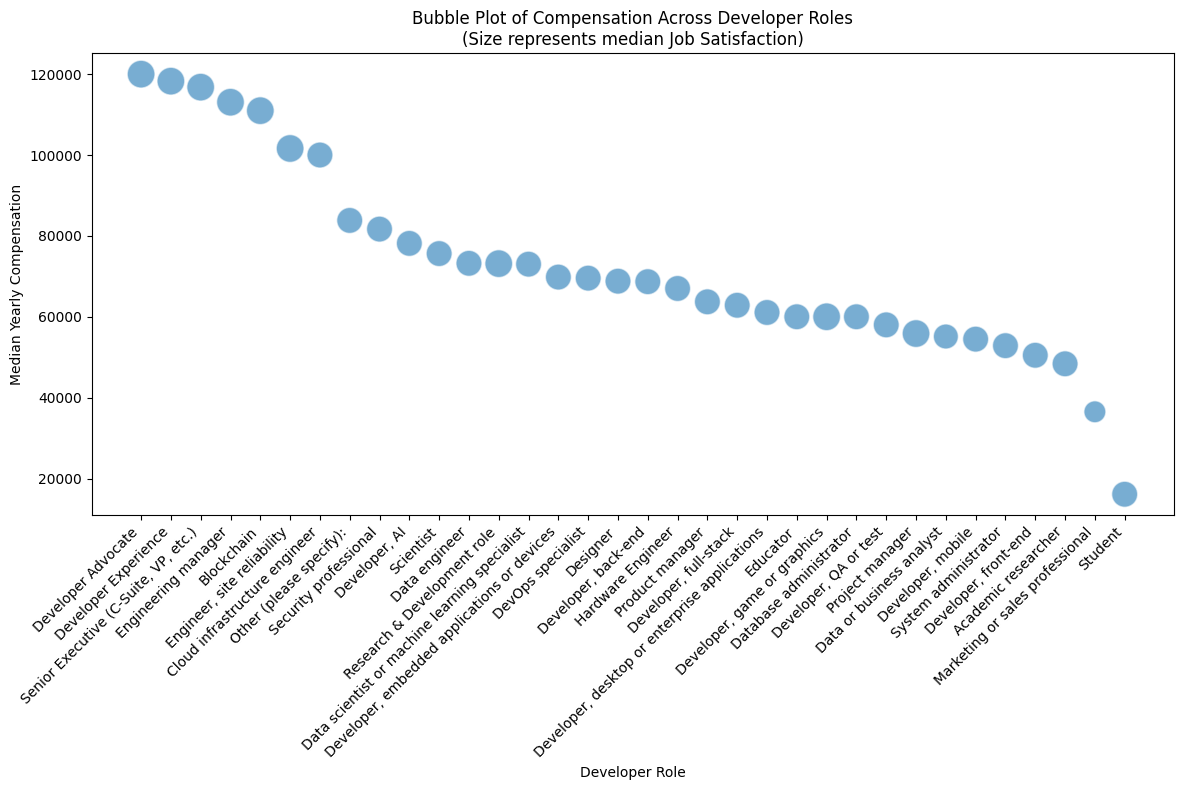

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing data in required columns
df_clean = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'])

# Explode semicolon-separated DevType into individual rows
df_expanded = df_clean.assign(
    DevType=df_clean['DevType'].str.split(';')
).explode('DevType')

# Group by DevType: calculate median compensation and median job satisfaction
grouped = df_expanded.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',
    'JobSat': 'median'
}).reset_index()

# Sort by median compensation descending for nicer plotting order
grouped = grouped.sort_values(by='ConvertedCompYearly', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=grouped['DevType'],
    y=grouped['ConvertedCompYearly'],
    s=grouped['JobSat'] * 50,  # scale bubble size, adjust factor as needed
    alpha=0.6,
    edgecolors='w'
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Developer Role')
plt.ylabel('Median Yearly Compensation')
plt.title('Bubble Plot of Compensation Across Developer Roles\n(Size represents median Job Satisfaction)')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


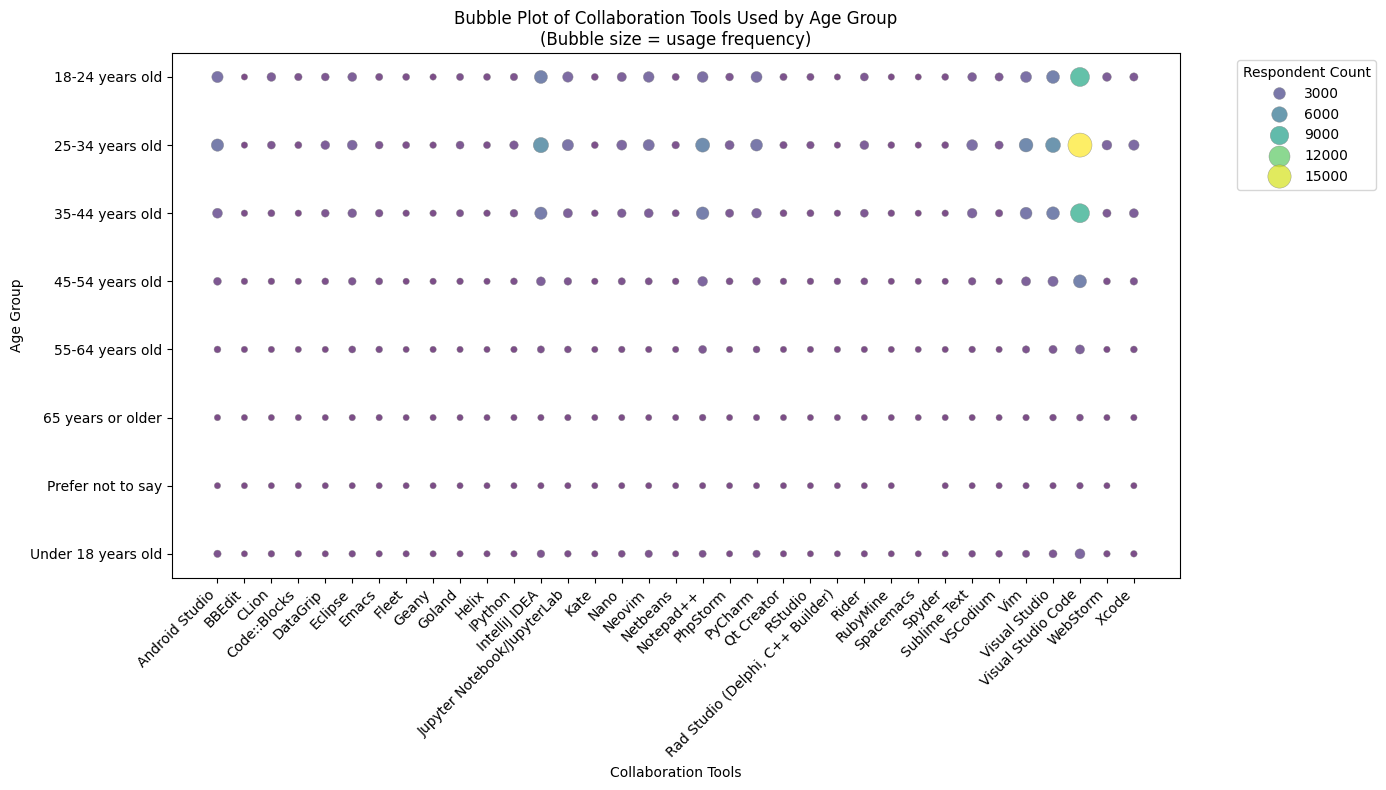

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing data in required columns
df_clean = df.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'])

# Explode the collaboration tools column
df_expanded = df_clean.assign(
    Tool=df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Group by Age and Tool to count frequency
freq = df_expanded.groupby(['Age', 'Tool']).size().reset_index(name='Count')

# Sort tools by total counts for nicer ordering
tool_order = freq.groupby('Tool')['Count'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=freq,
    x='Tool',
    y='Age',
    size='Count',
    sizes=(20, 300),
    legend='brief',
    hue='Count',  # optional: color by frequency
    palette='viridis',
    edgecolor='gray',
    alpha=0.7
)

# Beautify the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Collaboration Tools')
plt.ylabel('Age Group')
plt.title('Bubble Plot of Collaboration Tools Used by Age Group\n(Bubble size = usage frequency)')
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
##Write your code here

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
